## ***Import Libraries***

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## ***Data Reading and Exploration***

In [2]:
df=pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## ***EDA***

In [3]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


## ***Data Description***
- **work_year**: The year was paid.
- **experience_level**: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
- **employment_type**: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio**: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)
 

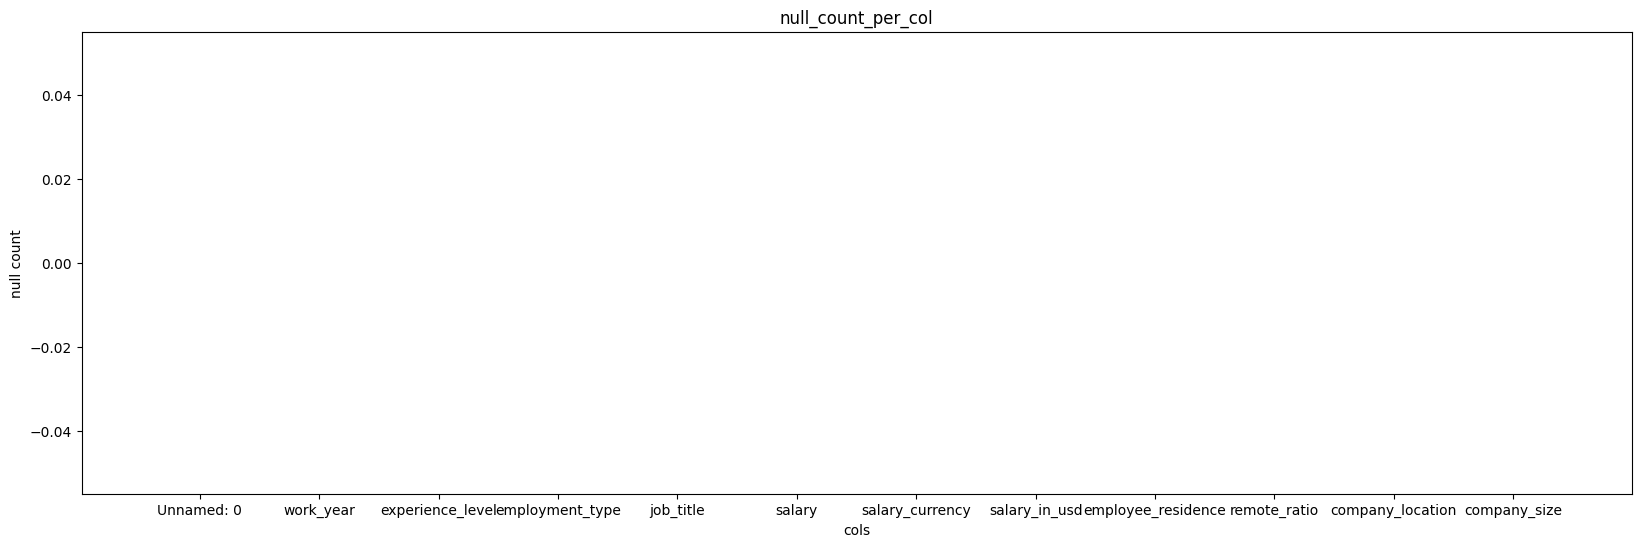

In [4]:
# Data Cleaning check for nulls
# visualize null count

null_count_per_col=df.isna().sum()

plt.figure(figsize=(20, 6))  

plt.bar(null_count_per_col.index,null_count_per_col.values)

plt.xlabel('cols')
plt.ylabel('null count')
plt.title('null_count_per_col')
plt.show()


#### ***it looks like we dont have any nulls so what about duplicated rows***

In [5]:
# Data Cleaning check for Duplicated Rows

df.duplicated().sum()


0

#### ***it looks like we dont have any nulls so what about high cardinality columns***

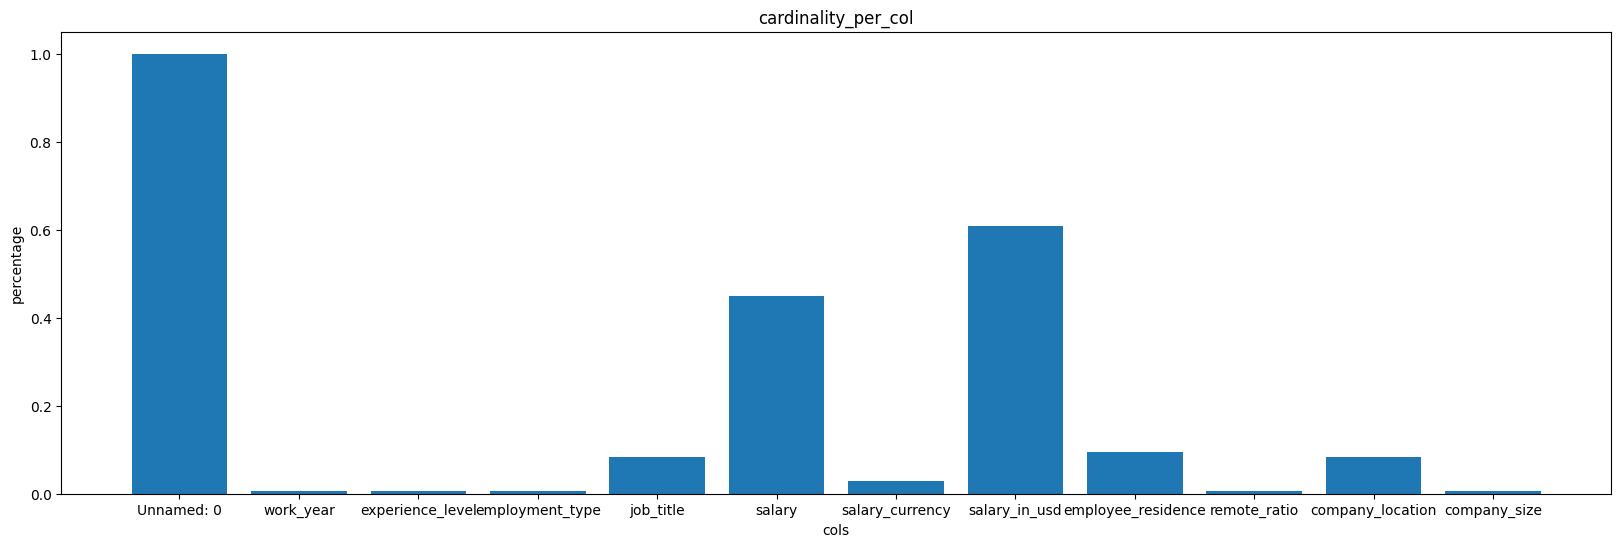

In [6]:
# check for cardinalityy 
card=(df.nunique()/len(df))

plt.figure(figsize=(20, 6))  

plt.bar(card.index,card.values)

plt.xlabel('cols')
plt.ylabel('percentage')
plt.title('cardinality_per_col')
plt.show()


#### ***index col unnamed:0 is a high cardinality col we need to drop it***

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

#### ***so lets check if company size impact the salary range***

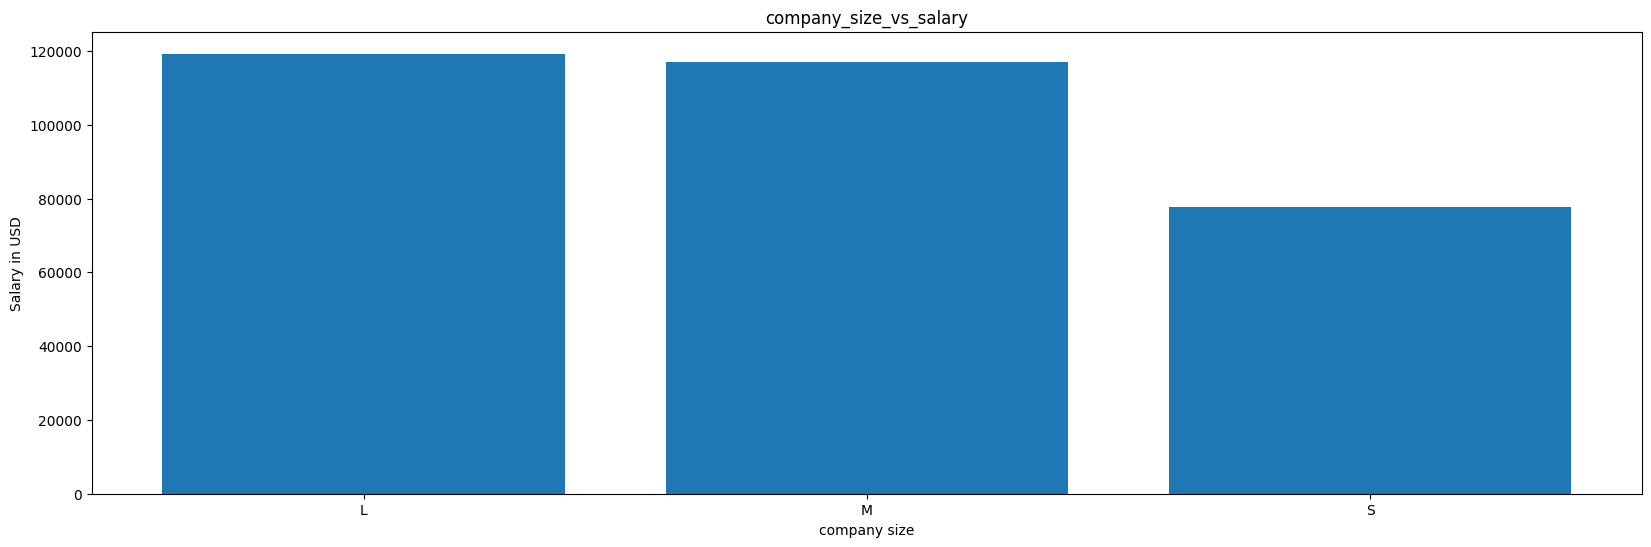

In [8]:
company_size_vs_salary=df.groupby('company_size')['salary_in_usd'].agg('mean')
plt.figure(figsize=(20, 6))  

plt.bar(company_size_vs_salary.index,company_size_vs_salary.values)

plt.xlabel('company size')
plt.ylabel('Salary in USD')
plt.title('company_size_vs_salary')
plt.show()


#### ***it looks like larger company pays more for those employees , now lets check how experience level affect salaries***

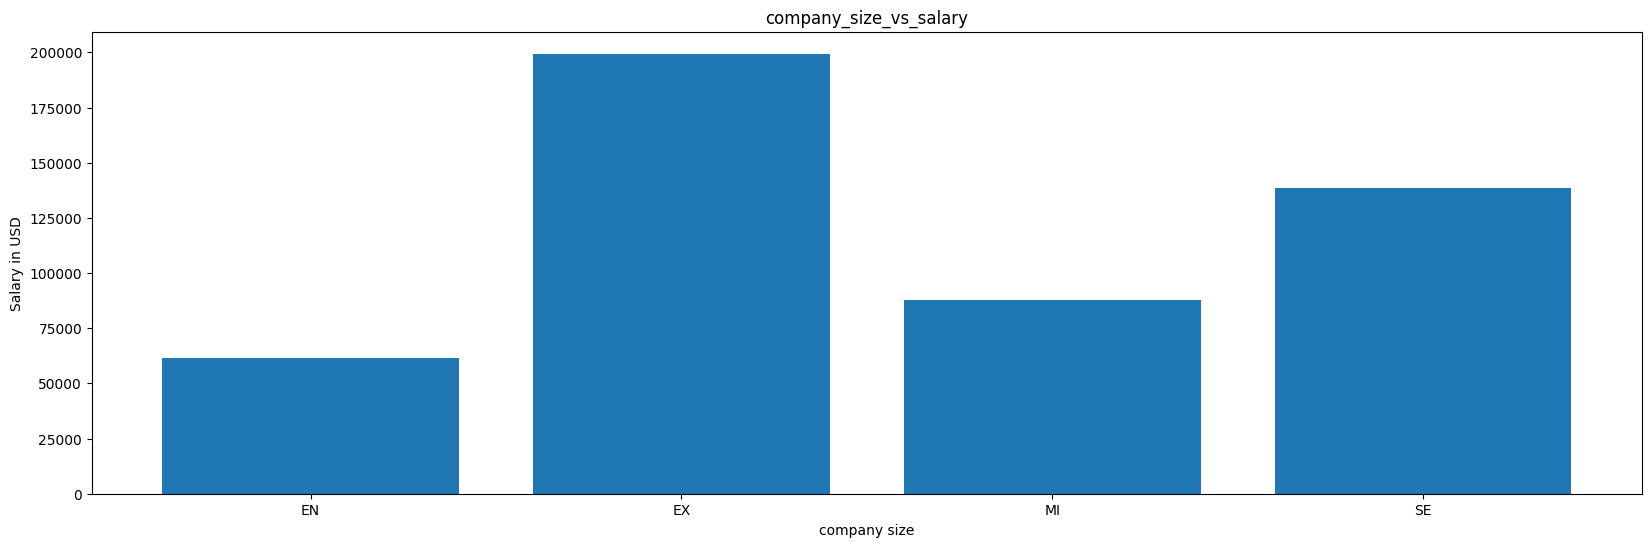

In [9]:
experience_vs_salary=df.groupby('experience_level')['salary_in_usd'].agg('mean')
plt.figure(figsize=(20, 6))  

plt.bar(experience_vs_salary.index,experience_vs_salary.values)

plt.xlabel('experience_level')
plt.ylabel('Salary in USD')
plt.title('experience_level_vs_salary')
plt.show()

#### ***it looks like the more experience you have the more salary you get , now what about different roles***

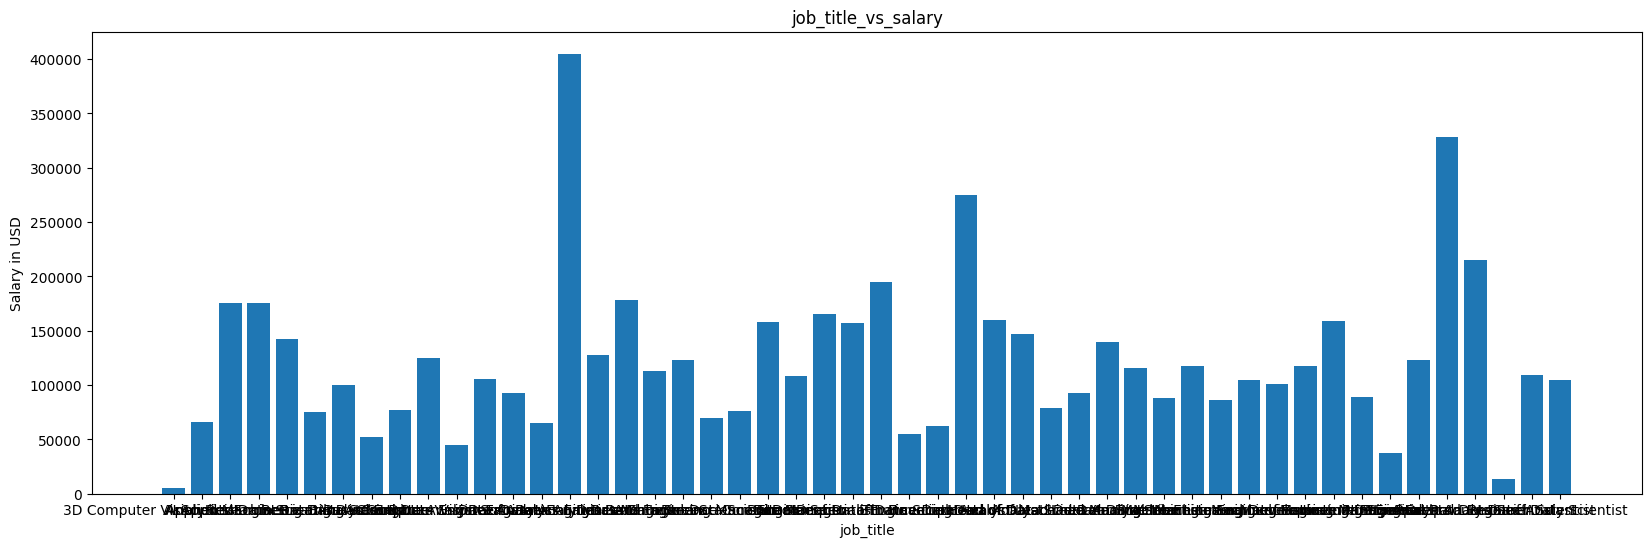

In [10]:
job_title_vs_salary=df.groupby('job_title')['salary_in_usd'].agg('mean')
plt.figure(figsize=(20, 6))  

plt.bar(job_title_vs_salary.index,job_title_vs_salary.values)

plt.xlabel('job_title')
plt.ylabel('Salary in USD')
plt.title('job_title_vs_salary')
plt.show()

#### ***different roles get paid differently,here is top 10***

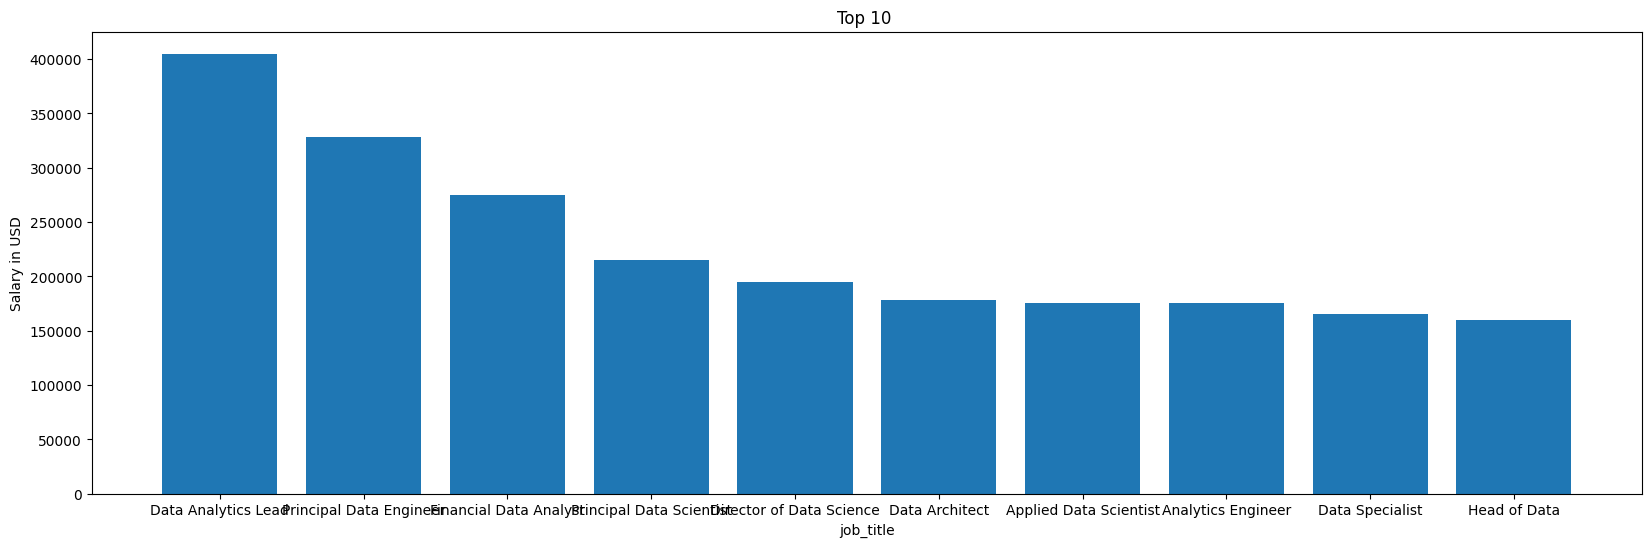

In [11]:
job_title_vs_salary=df.groupby('job_title')['salary_in_usd'].agg('mean').sort_values(ascending=False)[:10]
plt.figure(figsize=(20, 6))  

plt.bar(job_title_vs_salary.index,job_title_vs_salary.values)

plt.xlabel('job_title')
plt.ylabel('Salary in USD')
plt.title('Top 10 ')
plt.show()